# Image processing
This notebook details how the video stream is processed before entering the neural network.

In [1]:
import numpy as np
import dlib
import heartsight as hs
import cv2
import matplotlib.pyplot as plt

## Webcam recording

In [13]:
face_buffer_list = []

with hs.open_webcam() as webcam:

    exit_requested = False
    previous_face_rectangle = None
    while not exit_requested:
        rgb_frame = hs.capture_frame(webcam)
        gray_frame = hs.rgb_to_gray(rgb_frame)
        detected_faces = face_detector(gray_frame, 1)

        face_rectangle = detected_faces[0] if detected_faces else previous_face_rectangle

        if face_rectangle:
            x,y,w,h = hs.dlib_rectangle_to_xywh(face_rectangle)
            face_frame = cv2.resize(rgb_frame[y:y+h, x:x+w], (facebox_width, facebox_width))
            hs.refresh_display(face_frame)
            face_buffer_list.append(face_frame)
            previous_face_rectangle = face_rectangle
        
        exit_requested = hs.detect_q_key_pressed()

face_buffer = np.stack(face_buffer_list)


In [2]:
sample1 = hs.record_sample()

In [3]:
sample1['fps']

28.762540261493484

## Face extraction

In [27]:

face_detector = hs.create_face_detector()
previous_face_rectangle = None
facebox_width=128

frames = sample1['frames']

face_frames_buffer = []
for frame in frames:
    detected_faces = face_detector(frame)
    face_rectangle = detected_faces[0] if detected_faces else previous_face_rectangle
    
    if face_rectangle:
        face_frame = dlib.resize_image(dlib.sub_image(frame, face_rectangle), facebox_width, facebox_width)
        face_frames_buffer.append(face_frame)

In [4]:
face_frames = hs.extract_face_frames(sample1['frames'])

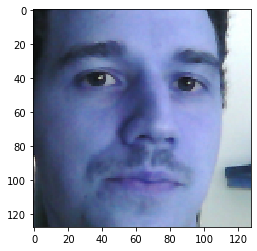

In [7]:
plt.imshow(face_frames[-1])
plt.show()

## First tests with FFT

In [3]:
Y = np.fft.fft(sample1['frames'], axis=0)
Y.shape

(155, 128, 128, 3)

In [4]:
freq = np.fft.fftfreq(sample1['frames'].shape[0], 1/sample1['fps'])
freq.shape

(155,)

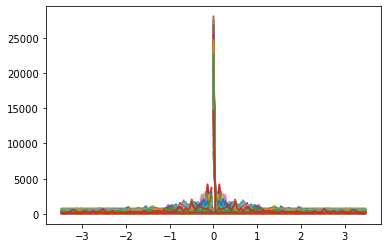

In [8]:
Y_reshaped = Y.reshape((Y.shape[0], -1, 3))

plt.figure()
for i_point in range(0, Y_reshaped.shape[1], 100):
    plt.plot(freq, np.abs(Y_reshaped[:, i_point, 0]))
plt.show()

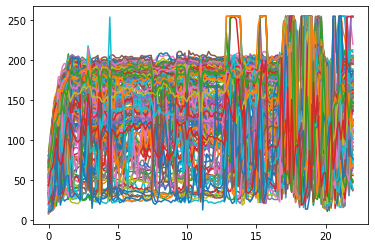

In [21]:
reshaped_frames = sample1['frames'].reshape(sample1['frames'].shape[0], -1, 3)
plt.figure()
for i_point in range(0, reshaped_frames.shape[1], 100):
    plt.plot(np.arange(sample1['frames'].shape[0]/sample1['fps'], step=1/sample1['fps']), reshaped_frames[:, i_point, 1])
plt.show()

In [19]:
np.arange(np.float(sample1['frames'].shape[0])/sample1['fps'], step=1/sample1['fps'])

array([ 0.        ,  0.14267177,  0.28534353,  0.4280153 ,  0.57068707,
        0.71335883,  0.8560306 ,  0.99870237,  1.14137413,  1.2840459 ,
        1.42671767,  1.56938943,  1.7120612 ,  1.85473297,  1.99740473,
        2.1400765 ,  2.28274827,  2.42542003,  2.5680918 ,  2.71076357,
        2.85343533,  2.9961071 ,  3.13877886,  3.28145063,  3.4241224 ,
        3.56679416,  3.70946593,  3.8521377 ,  3.99480946,  4.13748123,
        4.280153  ,  4.42282476,  4.56549653,  4.7081683 ,  4.85084006,
        4.99351183,  5.1361836 ,  5.27885536,  5.42152713,  5.5641989 ,
        5.70687066,  5.84954243,  5.9922142 ,  6.13488596,  6.27755773,
        6.4202295 ,  6.56290126,  6.70557303,  6.8482448 ,  6.99091656,
        7.13358833,  7.2762601 ,  7.41893186,  7.56160363,  7.7042754 ,
        7.84694716,  7.98961893,  8.1322907 ,  8.27496246,  8.41763423,
        8.560306  ,  8.70297776,  8.84564953,  8.9883213 ,  9.13099306,
        9.27366483,  9.41633659,  9.55900836,  9.70168013,  9.84

In [17]:
np.float(sample1['frames'].shape[0])/sample1['fps']

22.114123821258545

In [18]:
1/sample1['fps']

0.14267176658876482

In [26]:
import time
face_frames_buffer = []

with hs.open_webcam() as webcam:

    exit_requested = False
    recording_start_time = time.time()

    i=0
    while i<100:

        rgb_frame = hs.capture_frame(webcam)
        face_frames_buffer.append(rgb_frame)
        exit_requested = hs.detect_q_key_pressed()
        i+=1

    recording_end_time = time.time()

np.float(len(face_frames_buffer))/(recording_end_time - recording_start_time)

27.172865073115883